# 💉 단회 정맥 투여 후 약물 농도-시간 시뮬레이션
### 📈 수식

약물 농도는 다음의 지수함수를 따릅니다:

$C(t) = \dfrac{\text{Dose}}{V_d} \cdot e^{-k t}$

- \( C(t) \): 시간 \( t \)에서의 농도
- \( \frac{CL}{V_d} \): 소실속도상수 \( k \)

---

### 🔍 시각화 요소 설명

- **곡선:** 약물의 농도 변화
- **보라 점선:** 약물 농도가 절반으로 줄어드는 시간 (**Half-life**)  
  $
  t_{1/2} = \frac{\ln 2}{k}
  $
- **주황 음영 영역:** 약물 농도 곡선 아래 면적 (AUC: Area Under the Curve)  
  $
  AUC = \frac{\text{Dose}}{CL}
  $

---

### 💡 해석

- **Vd가 클수록**: 초기 농도 \( C_0 \)가 낮아집니다 (분포가 넓어짐)
- **CL이 클수록**: 곡선이 빠르게 내려갑니다 (빠르게 제거됨)
- **AUC는 약물 노출의 총량**을 나타내며, Clearance에 반비례합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 때문에..

In [2]:
Dose = 500 #mg
Vd = 50 #L
CL = 5 #L/hr

#수식 정의
k = CL/Vd
t_half = np.log(2) / k
AUC = Dose/ CL

#시간 범위 및 농도 계산
time = np.linspace(0, 24, 200)
concentration = (Dose/Vd) * np.exp(-k * time)

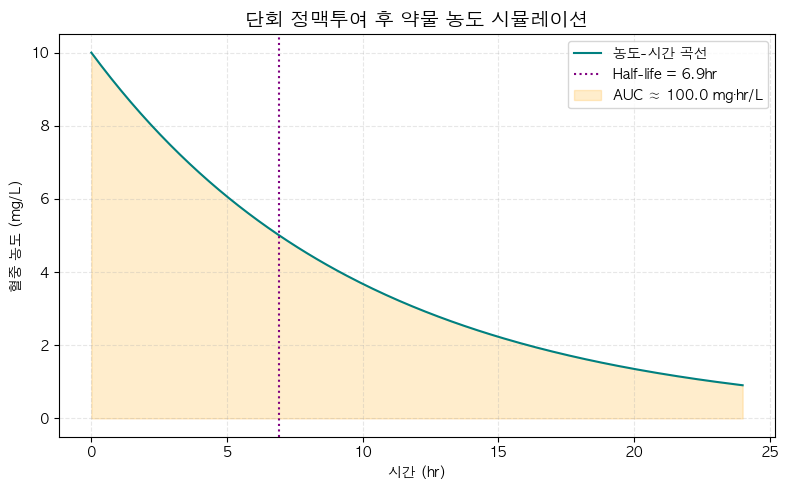

In [3]:
plt.figure(figsize = (8,5))
plt.plot(time, concentration, label = "농도-시간 곡선", color="teal")

plt.axvline(t_half, linestyle = ':', color = 'purple', label =f'Half-life = {t_half:.1f}hr') #f-string 포맷팅 문법

#AUC 음영 처리
plt.fill_between(time, concentration, alpha=0.2, color = 'orange', label=f"AUC ≈ {AUC:.1f} mg·hr/L")

plt.title("단회 정맥투여 후 약물 농도 시뮬레이션", fontsize=14)
plt.xlabel('시간 (hr)')
plt.ylabel('혈중 농도 (mg/L)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 💊 정맥(IV) vs 경구(PO) 투여 비교 & 생체이용률 (Bioavailability, F)
### 📈 수식

#### 정맥투여 (IV bolus):
\[
C_{\text{IV}}(t) = \frac{\text{Dose}}{V_d} \cdot e^{-k \cdot t}
\]
- \( k = \frac{CL}{V_d} \): 소실속도상수

#### 경구투여 (1차 흡수/소실 모델):
\[
C_{\text{PO}}(t) = \frac{F \cdot \text{Dose} \cdot k_a}{V_d (k_a - k)} \left( e^{-k \cdot t} - e^{-k_a \cdot t} \right)
\]

- \( F \): Bioavailability (생체이용률)
- \( k_a \): 흡수속도상수

---

### 🔍 시각화 요소

- **파란 선 (IV)**: 즉시 도달 후 소실
- **주황 선 (PO)**: 흡수 → 최대치 → 소실
- **곡선 아래 면적 (AUC)**:  
  - IV: 기준  
  - PO: **AUC가 줄어들수록 F가 낮음**

---

### 💡 해석 요약

| 항목 | IV | PO |
|------|----|----|
| 시작 시간 | 즉시 (t=0) | 지연 발생 |
| 최고점 (Cmax) | 점점 감소 | 시간 지나 도달 |
| AUC | 전체 노출량 | **F × IV AUC** 만큼 작아짐 |
| F (Bioavailability) | 1 (100%) | 0.6 (60%) 등 |

In [4]:
Dose = 500 #mg
Vd = 50 #L
CL = 5 #L/hr
F = 0.6 #bioavailability
ka = 1.0 #경구 흡수 속도 상수
k = CL/Vd #소실속도상수

time = np.linspace(0, 24, 300)
C_iv = (Dose/Vd) * np.exp(-k * time)
C_po = (F*Dose*ka / Vd*(ka-k)) * (np.exp(-k * time)-np.exp(-ka*time))

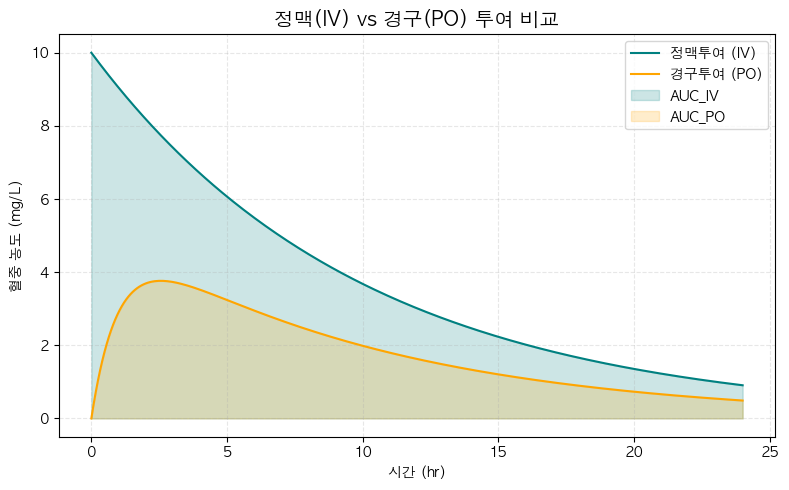

In [7]:
plt.figure(figsize=(8,5))
plt.plot(time, C_iv, label = '정맥투여 (IV)', color = 'teal')
plt.plot(time, C_po, label = '경구투여 (PO)', color = 'orange')
plt.fill_between(time, C_iv, alpha=0.2, color = 'teal', label='AUC_IV')
plt.fill_between(time, C_po, alpha=0.2, color ='orange', label='AUC_PO')

plt.title("정맥(IV) vs 경구(PO) 투여 비교", fontsize = 14)
plt.xlabel("시간 (hr)")
plt.ylabel("혈중 농도 (mg/L)")
plt.legend()
plt.grid(True, linestyle = '--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# F 값에 따라 AUC가 달라지는 것 관찰하기
from ipywidgets import interact, FloatSlider

Dose = 500 #mg
Vd = 50 #L
CL = 5 #L/hr
ka = 1.0 #경구 흡수 속도 상수
k = CL/Vd #소실속도상수

def C_po(Dose, time, Vd, ka, k, F):
    return (F*Dose*ka / Vd*(ka-k)) * (np.exp(-k * time)-np.exp(-ka*time))

def plot_dose(F=0.5):
    time = np.linspace(0, 24, 300)
    c_po = C_po(Dose, time, Vd, ka, k, F)
    c_iv = (Dose/Vd) * np.exp(-k * time)
    AUC_po = np.trapz(c_po, time) #적분 np.trapz(y,x)
    AUC_iv = np.trapz(c_iv, time)

    plt.figure(figsize=(8,5))
    plt.plot(time, c_iv, label = '정맥투여(IV)', color = 'teal')
    plt.plot(time, c_po, label = '경구투여(PO)', color = 'orange')
    plt.fill_between(time, c_iv, alpha=0.2, color = 'teal')
    plt.fill_between(time, c_po, alpha=0.2, color = 'orange')
    plt.text(1, max(c_po)*1.1, f'AUC_PO = {AUC_po:.1f}\nF={F}\nAUC_po/AUC_iv={AUC_po:.1f}/{AUC_iv:.1f}={AUC_po/AUC_iv:.2f}', color ='black')

    plt.title(f"정맥(IV) vs 경구(PO, F={F})  투여 비교", fontsize = 14)
    plt.xlabel("시간 (hr)")
    plt.ylabel("혈중 농도 (mg/L)")
    plt.legend()
    plt.grid(True, linestyle = '--', alpha=0.3)
    plt.tight_layout()
    plt.show()

interact(
    plot_dose,
    F=FloatSlider(value=0.5, min=0, max=1, step=0.1, description='F(bioavailability)')
)

interactive(children=(FloatSlider(value=0.5, description='F(bioavailability)', max=1.0), Output()), _dom_class…

<function __main__.plot_dose(F=0.5)>

# 🔁 반복 투약과 Steady-State 농도 시뮬레이션

### 📐 수식 요약

\[
C(t) = \sum_{n=0}^{N} \frac{\text{Dose}}{V_d} \cdot e^{-k(t - n \cdot \tau)} \quad \text{단, } t \geq n \cdot \tau
\]

- \( \tau \): 투약 간격 (예: 12시간마다)  
- \( k = \frac{CL}{V_d} \): 소실속도상수  
- **여러 번의 exponential decay**를 합산한 모델

---

### 🔍 시각화 요소

- 투약 시점마다 피크 형성  
- **보라선:** Peak (Cmax)  
- **초록선:** 최저점 (Cmin)  
- **초기 상승 → 반복 후 일정한 형태 (Steady-State)**

---

### 💬 해석 포인트

- **Steady-state 도달까지 약 4~5 × 반감기**  
- **Dose/CL = 유지 용량 (maintenance dose)**  
- Steady-state 이후는 일정한 진폭 유지

In [14]:
Dose = 500 #mg
Vd = 50 #L
CL = 5 #L/hr
tau = 12 #투약간격(hr)
n_doses = 8 #투약 횟수

K = CL / Vd #소실속도상수
t_half = np.log(2) / k
time= np.linspace(0, tau*(n_doses+1), 1000)
concentration = np.zeros_like(time) #일단은 각 시간에 해당되는 농도 모두 0이라 하기

#반복 투약 계산: 시간마다 잔여농도 더하기
for n in range(n_doses):
    dose_time = n*tau #투약시간
    C_n = (Dose/Vd) * np.exp(-k*(time-dose_time))
    C_n[time < dose_time] = 0 #투약 이전의 농도는 0으로 처리
    concentration += C_n


In [19]:
peak = concentration.max()
loading_dose = peak * Vd
maintenance_dose = peak * CL
print(f'loading dose is {loading_dose:.1f} mg')
print(f'maintenacne dose is {maintenance_dose:.1f} mg/hr')

loading dose is 715.5 mg
maintenacne dose is 71.5 mg/hr


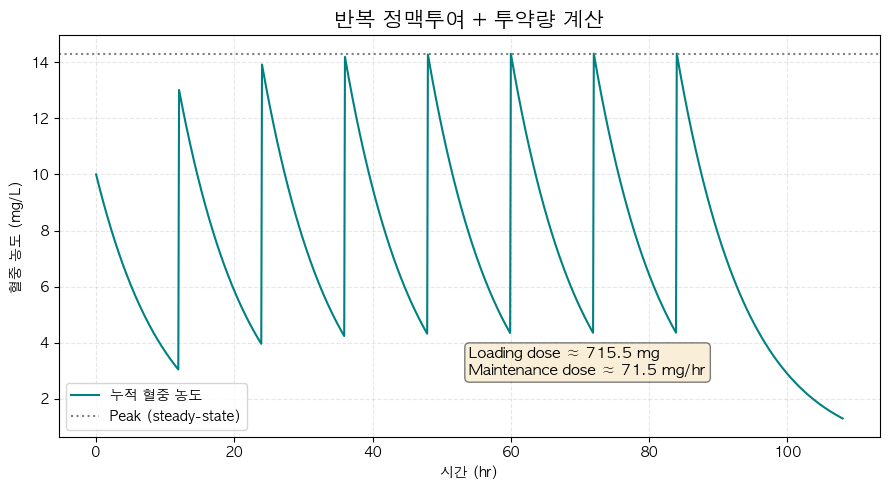

In [31]:
plt.figure(figsize=(9,5))
plt.plot(time, concentration, label='누적 혈중 농도', color='teal')
plt.axhline(peak, linestyle=':', color='gray', label="Peak (steady-state)")

# 계산 결과 시각적으로 표시 plt.text(x, y, "내용")
plt.text(
    time[-1] * 0.5, peak * 0.2,
    f"Loading dose ≈ {loading_dose:.1f} mg\nMaintenance dose ≈ {maintenance_dose:.1f} mg/hr",
    fontsize=11, color='black', bbox=dict(boxstyle="round,pad=0.3", fc="wheat", alpha=0.5)
)

plt.title("반복 정맥투여 + 투약량 계산", fontsize=15)
plt.xlabel('시간 (hr)')
plt.ylabel('혈중 농도 (mg/L)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
peak = concentration.max()
loading_dose = peak * Vd
maintenance_dose = peak * CL
print(f'loading dose is {loading_dose:.1f} mg')
print(f'maintenacne dose is {maintenance_dose:.1f} mg/hr')

loading dose is 715.5 mg
maintenacne dose is 71.5 mg/hr


## ✅ 사용 기술 스택

- Python (NumPy, Matplotlib)
- Jupyter Notebook
- 로그 스케일 시각화 (`semilogx`)
- 반복 투약 모델링 (`for` 루프 + 조건)
- ipywidgets (bioavailability 슬라이더)